For the point of view of the Renter :
    
    What is the cheapiest neighborhood to stay in seattle 
    What is the busiest neighborhood to stay in seattle ?
    What is the busiest month to visit seattle ?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#df = pd.read_csv('seatle/listings.csv')

listing_data = pd.read_csv('seatle/listings.csv', sep = ',')
calender_data = pd.read_csv('seatle/calendar.csv', sep = ',')
review_data = pd.read_csv('seatle/reviews.csv', sep = ',')


listing_data.shape

(3585, 95)

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
listing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [4]:
listing_data.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,3575.000000,3576.000000,56.000000,3585.000000,3585.000000,3.585000e+03,0.0,3585.00000,3585.000000,3585.000000,3585.000000,3585.000000,2772.000000,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,1.255944,1.609060,858.464286,1.429847,3.171269,2.872584e+04,NaN,8.64993,21.833194,38.558159,179.346444,19.044630,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,0.000000e+00,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,0.753060,1.011745,608.874310,1.056787,8.874133,1.670136e+06,NaN,10.43533,21.860966,33.158272,142.136180,35.571658,9.531686,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,NaN,0.00000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,1.000000,1.000000,415.000000,1.000000,1.000000,3.650000e+02,NaN,0.00000,0.000000,0.000000,19.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,1.000000,1.000000,825.000000,1.000000,2.000000,1.125000e+03,NaN,4.00000,16.000000,37.000000,179.000000,5.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,2.000000,2.000000,1200.000000,1.000000,3.000000,1.125000e+03,NaN,15.00000,40.000000,68.000000,325.000000,21.000000,98.250000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,5.000000,16.000000,2400.000000,14.000000,300.000000,1.000000e+08,NaN,30.00000,60.000000,90.000000,365.000000,404.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [5]:
listing_data.describe(include = 'object')

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,calendar_updated,calendar_last_scraped,first_review,last_review,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
count,3585,3585,3585,3442,2528,3585,3585,2170,1610,2295,2096,2031,2393,2986,2986,3585,2986,3585,3585,3585,3574,2276,3114,3114,3114,3585,3585,3585,3246,3585,3585,3585,3585,3042,3585,3583,3585,3547,3571,3585,3585,3585,3585,3582,3585,3585,3585,3585,892,888,1342,2478,3585,3585,3585,2829,2829,3585,3585,3585,3585,3585
unique,3585,1,3504,3113,2268,3423,1,1728,1269,1859,1762,1617,1928,2986,2986,3585,2986,2181,1334,1281,176,1240,4,52,72,2,2174,2174,53,83,2,2,1239,30,25,38,1,43,4,39,1,1,2,13,3,5,3092,324,243,288,54,79,51,38,1,975,404,1,2,4,2,2
top,https://www.airbnb.com/rooms/13866603,2016-09-07,Lux 2BR by Fenway w/WiFi,"The unit is stylishly designed for comfort, va...",The studio's kitchenette comes equipped with a...,Studio offers the luxury of home furnishings w...,none,Conveniently bordering the neighborhoods of th...,Although we do not allow pets in our apartment...,"These newly constructed, luxury apartments epi...","You have access to the entire apartment, and a...",Need more towels? A restaurant recommendation?...,House Rules 1. Check-in is 4 pm local time. If...,https://a2.muscache.com/im/pictures/43f23708-8...,https://a2.muscache.com/im/pictures/36012320/a...,https://a2.muscache.com/im/pictures/0df6da29-5...,https://a2.muscache.com/im/pictures/39aa28b5-0...,https://www.airbnb.com/users/show/30283594,Kara,2015-03-30,"Boston, Massachusetts, United States",ABOUT US:\r\n\r\nSeamlessTransition is a full-...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/30283594/prof...,https://a2.muscache.com/im/users/30283594/prof...,Allston-Brighton,"['email', 'phone', 'reviews', 'jumio']",t,t,"Boylston Street, Boston, MA 02215, United States",Allston-Brighton,Jamaica Plain,Boston,MA,02116,Boston,"Boston, MA",US,United States,t,Apartment,Entire home/apt,Real Bed,{},$150.00,"$1,000.00","$3,500.00",$100.00,$100.00,$0.00,today,2016-09-06,2016-04-05,2016-09-05,f,f,strict,f,f
freq,1,3585,8,21,17,7,3585,21,44,26,48,58,44,1,1,1,1,136,138,137,2421,79,1384,2072,1210,3178,136,136,375,930,3577,2603,64,364,343,3381,3585,388,3568,3381,3585,3585,3080,2612,2127,3453,32,144,48,30,299,353,2211,833,3585,23,118,3585,2991,1582,3518,3348


In [6]:
listing_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

Text(0.5, 1.0, 'Numbers in Each Neigbourhoods')

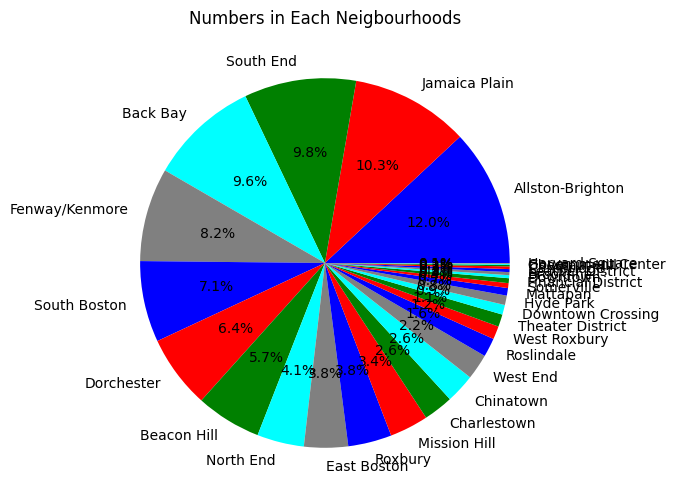

In [47]:
plt.figure(figsize=(6,6))
numbers = listing_data['neighbourhood'].value_counts()
plt.pie(numbers.values, labels=numbers.index, colors=['b', 'r', 'g', 'cyan', 'gray'], autopct='%1.1f%%')
plt.title('Numbers in Each Neigbourhoods')

In [8]:
calender_data.shape

(1308890, 4)

In [9]:
calender_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [10]:
calender_data.rename(columns = {'listing_id':'id'}, inplace = True)

In [11]:
calender_data.id.value_counts()

12898806    730
3250739     365
11376403    365
901914      365
5270703     365
           ... 
5718921     365
951473      365
3946215     365
7540480     365
14710769    365
Name: id, Length: 3585, dtype: int64

In [12]:
target_columns = [ "street", "neighbourhood", "neighbourhood_cleansed","neighbourhood_group_cleansed", "city", "state", "zipcode", "market","smart_location",'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact' ]
data = pd.concat([calender_data, listing_data[target_columns]], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 18 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   id                            1308890 non-null  int64  
 1   date                          1308890 non-null  object 
 2   available                     1308890 non-null  object 
 3   price                         643037 non-null   object 
 4   street                        3585 non-null     object 
 5   neighbourhood                 3042 non-null     object 
 6   neighbourhood_cleansed        3585 non-null     object 
 7   neighbourhood_group_cleansed  0 non-null        float64
 8   city                          3583 non-null     object 
 9   state                         3585 non-null     object 
 10  zipcode                       3547 non-null     object 
 11  market                        3571 non-null     object 
 12  smart_location              

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


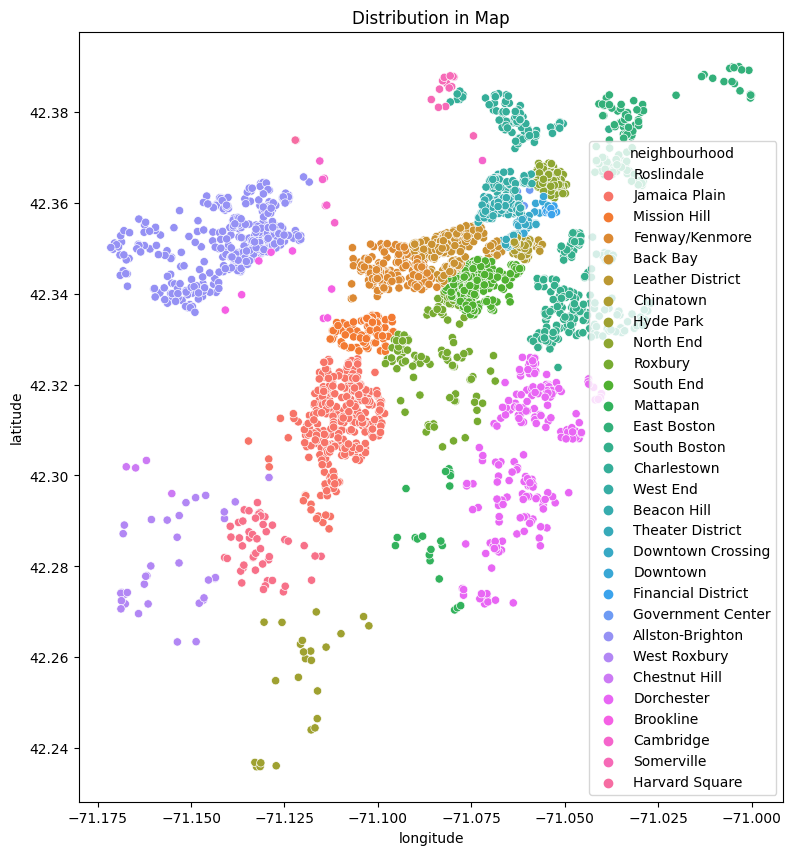

In [53]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
sns.scatterplot(data['longitude'], data['latitude'], hue=data['neighbourhood'], ax=ax1)
ax1.set_title('Distribution in Map')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


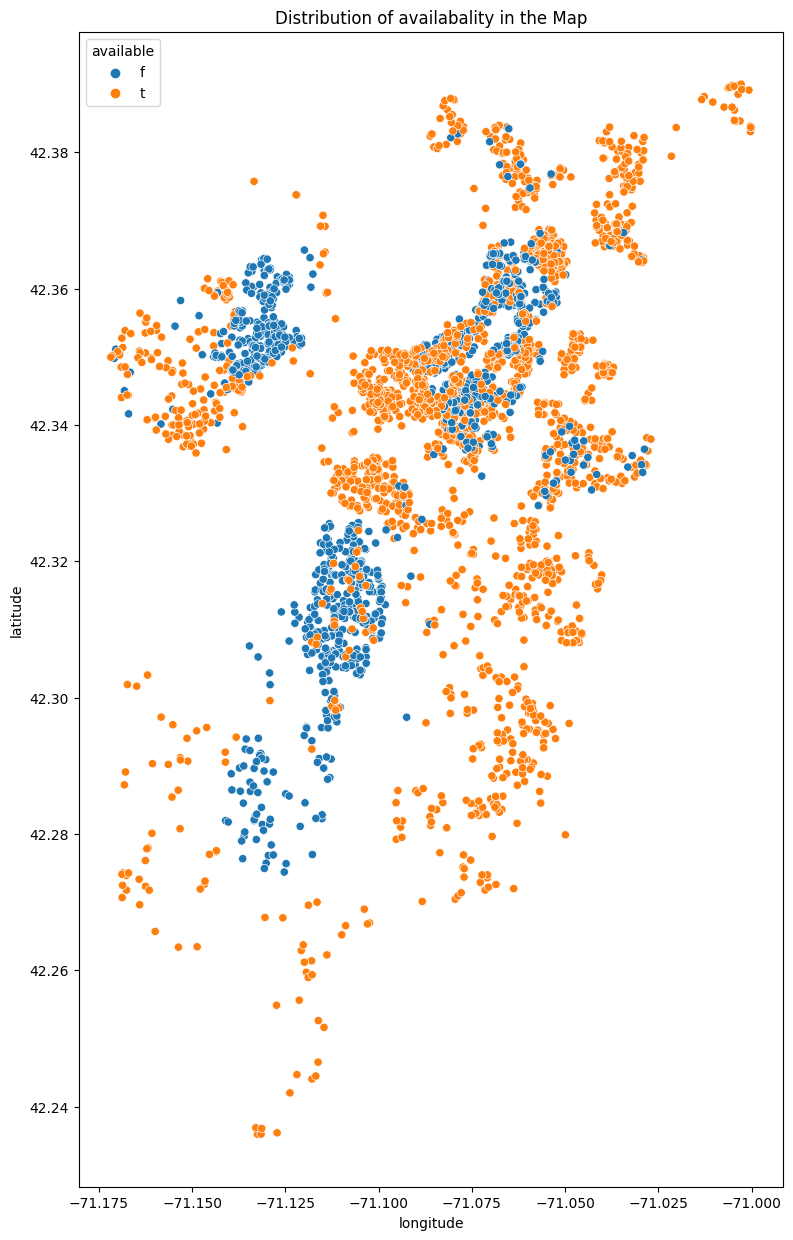

In [54]:
fig = plt.figure(figsize=(20,15))
ax2 = fig.add_subplot(122)
sns.scatterplot(data['longitude'], data['latitude'], hue=data['available'], ax=ax2)
ax2.set_title('Distribution of availabality in the Map')
plt.show()

In [14]:
filt =(data['available'].str.contains('t',na=False))
filt
#filt.groupby(['neighbourhood_group_cleansed']).count()
#data.loc[data.groupby(['neighbourhood_group_cleansed']).count(),filt]

0          False
1          False
2          False
3          False
4          False
           ...  
1308885    False
1308886    False
1308887    False
1308888    False
1308889    False
Name: available, Length: 1308890, dtype: bool

In [32]:

data.groupby(['neighbourhood']).count()

,id,date,available,price,street,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,month,year
neighbourhood,,,,,,,,,,,,,,,,,,,
Allston-Brighton,364,364,364,144,364,364,0,364,364,363,360,364,364,364,364,364,364,364,364
Back Bay,291,291,291,127,291,291,0,291,291,291,290,291,291,291,291,291,291,291,291
Beacon Hill,174,174,174,38,174,174,0,174,174,174,174,174,174,174,174,174,174,174,174
Brookline,8,8,8,8,8,8,0,8,8,8,7,8,8,8,8,8,8,8,8
Cambridge,7,7,7,7,7,7,0,7,7,7,7,7,7,7,7,7,7,7,7
Charlestown,79,79,79,70,79,79,0,79,79,79,79,79,79,79,79,79,79,79,79
Chestnut Hill,4,4,4,4,4,4,0,2,4,4,4,4,4,4,4,4,4,4,4
Chinatown,78,78,78,65,78,78,0,78,78,78,77,78,78,78,78,78,78,78,78
Dorchester,195,195,195,195,195,195,0,195,195,195,195,195,195,195,195,195,195,195,195


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


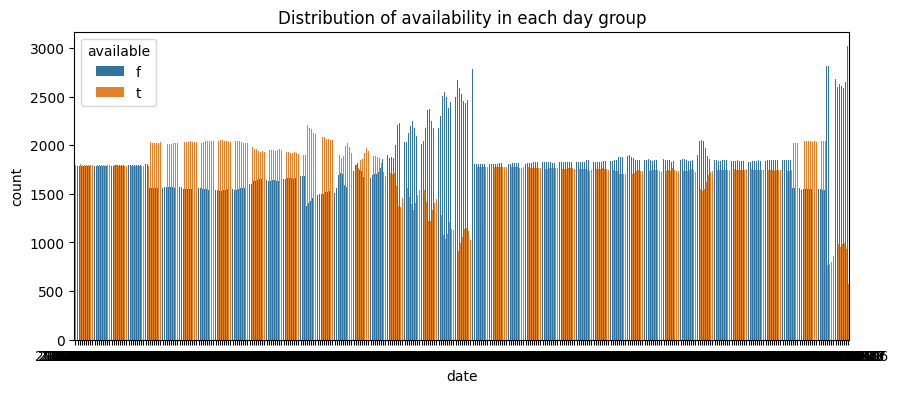

In [16]:
plt.figure(figsize=(10,4))
sns.countplot(data['date'], hue=data['available'])
plt.title('Distribution of availability in each day group')
plt.show()

In [30]:
data['price'] = data['price'].astype(float)
mean_price_for_listing = data.groupby('id').mean()['price']

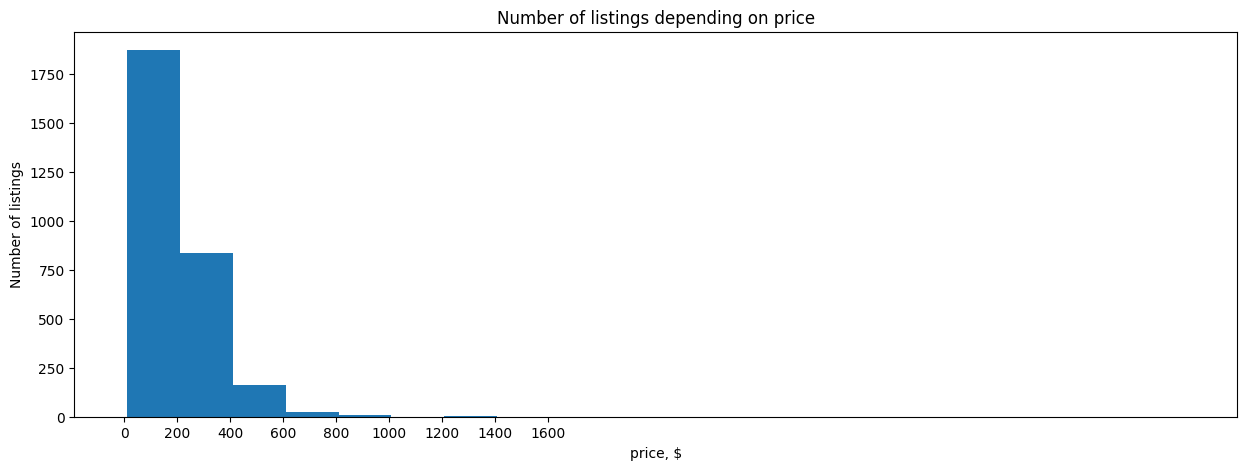

In [35]:
#plot
plt.figure(figsize=(15,5))
plt.hist(mean_price_for_listing, bins=20)
plt.xticks(np.arange(0, 1700, step=200))
plt.ylabel('Number of listings')
plt.xlabel('price, $')
plt.title('Number of listings depending on price')


plt.savefig('Price distrubution.png')

plt.show()

In [19]:
def get_month_from_date(row):
    ''' Get month from date represented as a string '''
    return int(row['date'].split('-')[1])

def get_year_from_date(row):
    ''' Get year from date represented as a string '''
    return int(row['date'].split('-')[0])
#convert date from the calendar into month and drop the date colum
data['month'] = data.apply(lambda row: get_month_from_date(row),axis=1)
data['year'] = data.apply(lambda row: get_year_from_date(row),axis=1)
#data = data.drop(columns = ['date'])

In [20]:
#find number of total number of listings for each month in 2016
number_of_listings_by_month = pd.Series([12])
for i in range(1, 13):
    number_of_listings_by_month[i] = len(data[(data['month'] == i)]['id'].unique())
    
number_of_listings_by_month = number_of_listings_by_month.drop(0)

number_of_listings_by_month

1     3585
2     3585
3     3585
4     3585
5     3585
6     3585
7     3585
8     3585
9     3585
10    3585
11    3585
12    3585
dtype: int64

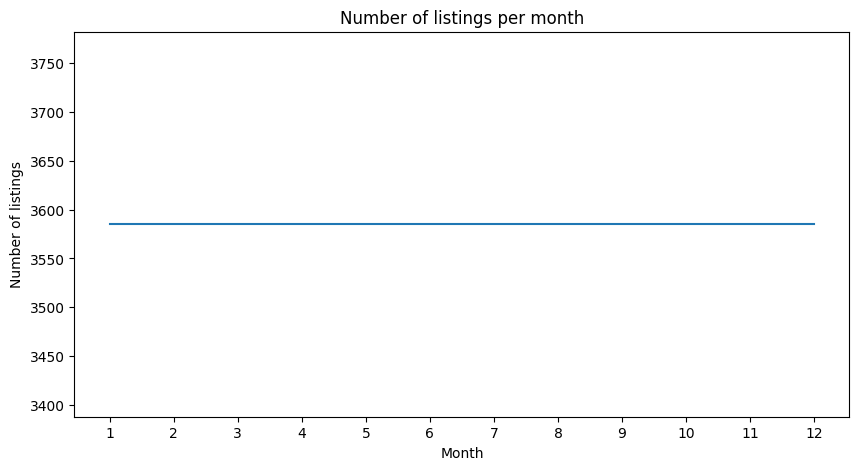

In [21]:
#find number of total number of listings for each month in 2016
number_of_listings_by_month = pd.Series([12])
for i in range(1, 13):
    number_of_listings_by_month[i] = len(data[(data['month'] == i)]['id'].unique())
    
number_of_listings_by_month = number_of_listings_by_month.drop(0)

#plot
plt.figure(figsize=(10,5))
plt.plot(number_of_listings_by_month)
plt.xticks(np.arange(1, 13, step=1))
plt.ylabel('Number of listings')
plt.xlabel('Month')
plt.title('Number of listings per month')

plt.savefig('number of available listings.png')

plt.show()

In [39]:
nhg=data.neighbourhood.unique()
nhg

array(['Roslindale', nan, 'Jamaica Plain', 'Mission Hill',
       'Fenway/Kenmore', 'Back Bay', 'Leather District', 'Chinatown',
       'Hyde Park', 'North End', 'Roxbury', 'South End', 'Mattapan',
       'East Boston', 'South Boston', 'Charlestown', 'West End',
       'Beacon Hill', 'Theater District', 'Downtown Crossing', 'Downtown',
       'Financial District', 'Government Center', 'Allston-Brighton',
       'West Roxbury', 'Chestnut Hill', 'Dorchester', 'Brookline',
       'Cambridge', 'Somerville', 'Harvard Square'], dtype=object)

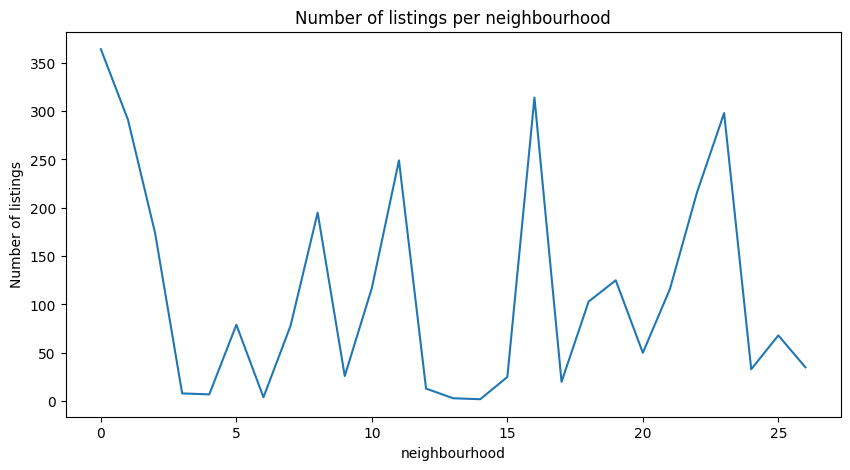

In [46]:
#find number of total number of listings for each neighbourhood_group_cleansed
df1=data.groupby(['neighbourhood']).count()
number_of_listings_by_neighbourhood = df1['id'].unique()
    
nb=data.neighbourhood_group_cleansed.unique()
#plot
plt.figure(figsize=(10,5))
plt.plot(number_of_listings_by_neighbourhood)
plt.ylabel('Number of listings')
plt.xlabel('neighbourhood')
plt.title('Number of listings per neighbourhood')

plt.savefig('number of available listings.png')

plt.show()

In [24]:
least_price = data.groupby('neighbourhood')['price'].mean().sort_values(ascending=True).head(20)
Highest_price = data.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(20)

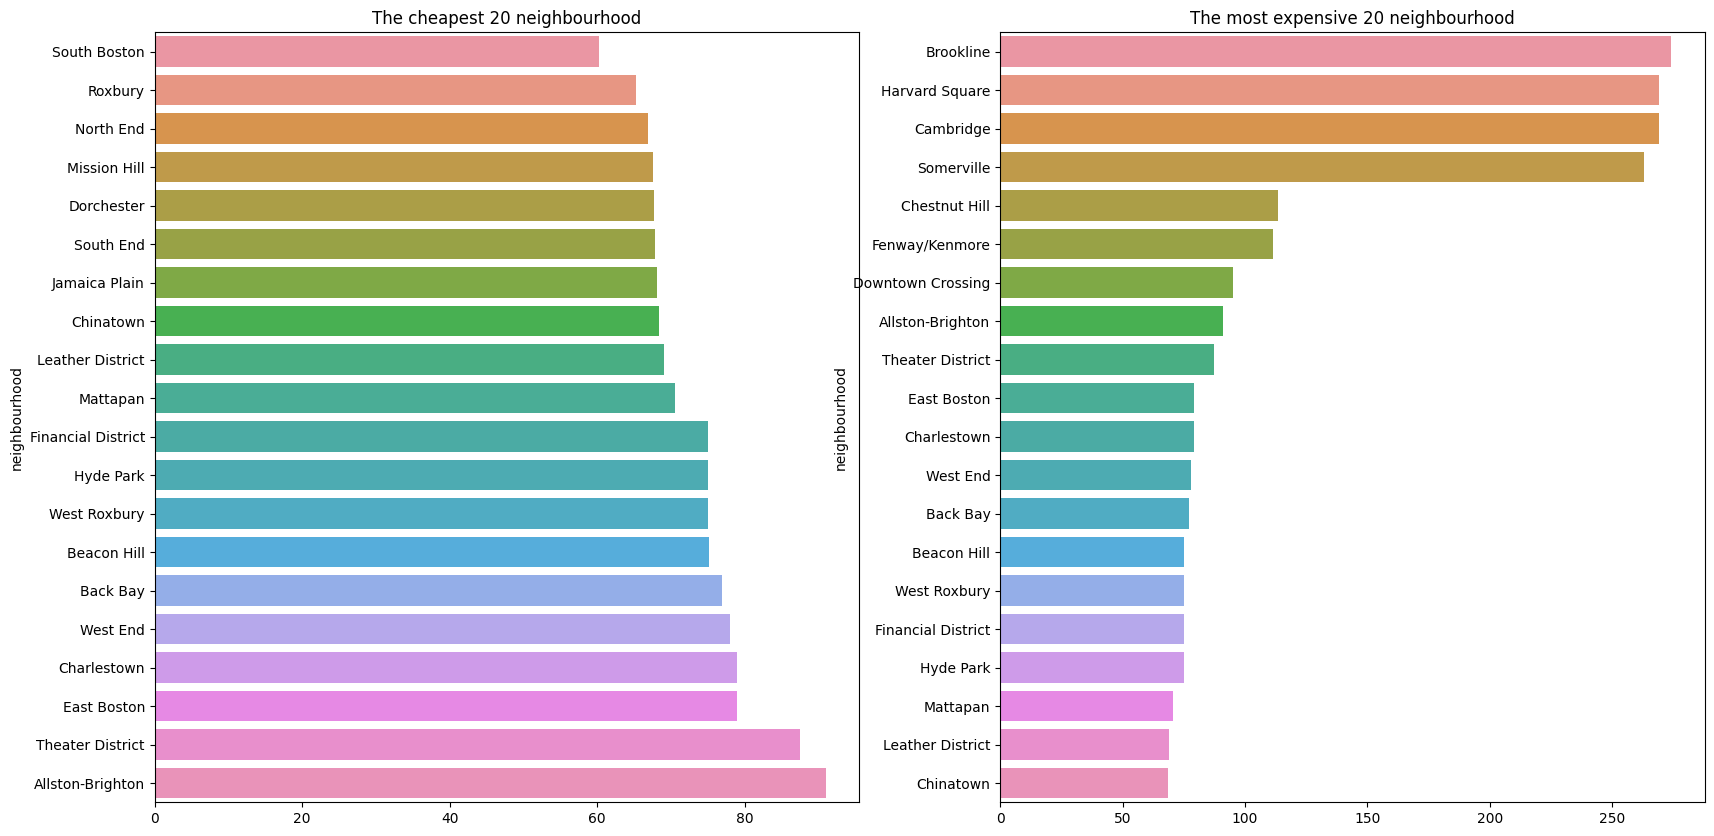

In [25]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121)
sns.barplot(y=least_price.index, x=least_price.values, ax=ax1)
ax1.set_title('The cheapest 20 neighbourhood')

ax2 = fig.add_subplot(122)
sns.barplot(y=Highest_price.index, x=Highest_price.values, ax=ax2)
ax2.set_title('The most expensive 20 neighbourhood')
plt.show()

In [26]:
least_busy = data.groupby('neighbourhood')['date'].count().sort_values(ascending=True).head(20)
busiest = data.groupby('neighbourhood')['date'].count().sort_values(ascending=False).head(20)

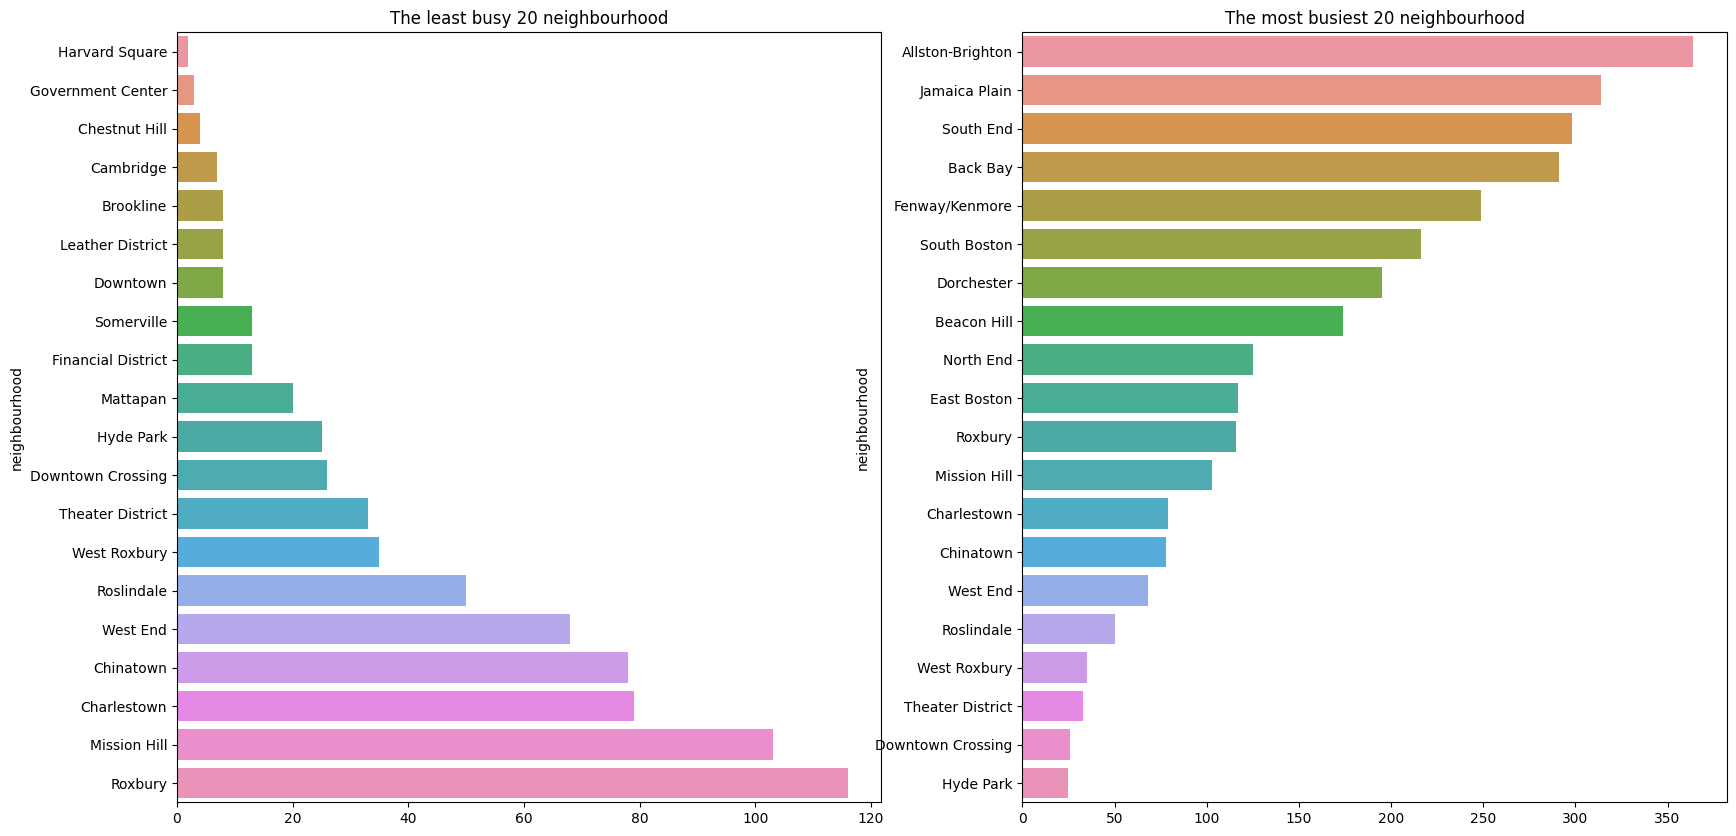

In [27]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121)
sns.barplot(y=least_busy.index, x=least_busy.values, ax=ax1)
ax1.set_title('The least busy 20 neighbourhood')

ax2 = fig.add_subplot(122)
sns.barplot(y=busiest.index, x=busiest.values, ax=ax2)
ax2.set_title('The most busiest 20 neighbourhood')
plt.show()